## Cristian Alejandro Pulido
## cpulido@unal.edu.co
## Assignment 3

## 1 Punto

Ya que el espacio $\phi(X)$ es un espacio vectorial con producto interno que cumple

$$||\phi(x)||=(<\phi(x),\phi(x)>)^{1/2}$$

Reemplazando en la ecuacion para la distancia media al centro de masa 

$$||\phi(x_i)-\phi_S(x)||=(<\phi(x_i)-\phi_S(x),\phi(x_i)-\phi_S(x)>)^{1/2}$$

como el producto interior bilineal y simetrico, lo ultimo es equivalente a 

$$(<\phi(x_i),\phi(x_i)>-2<\phi(x_i),\phi_S(x)>+<\phi_S(x),\phi_S(x)>)^{1/2}$$

Reemplazando $\phi_S(x)=\sum_{j=1}^n{\phi(x_j)}$ y por la propiedad de bilinealidad

$$<\phi(x_i),\phi_S(x)>=\frac{1}{n}\sum_{j=1}^n{<\phi(x_i),\phi(x_j)>}  $$

$$<\phi_S(x),\phi_S(x)>=\frac{1}{n^2}\sum_{i=1}^n\sum_{j=1}^n{<\phi(x_i),\phi(x_j)>}$$

Por ultimo como $k$ es un kernel sobre $X$ se debe tiene que

$$k(x,y)=<\phi(x),\phi(y)>$$

In [19]:
import numpy as np
def solucion(X,k):
    n=X.shape[0]
    C=0
    for i in range(n):
        for j in range(n):
            C=C+k(X[i],X[j])
    C=1.0/(n**2)*C
    
    total=0
    for i in range(n):
        A=k(X[i],X[i])
        B=0
        for j in range(n):
            B=B+k(X[i],X[j])
        B=1.0/n*B
        total=total+np.sqrt(A-2*B+C)
    total=1.0/n*total
    return total

def k1(x,y):
    return np.dot(x,y) 
def k2(x,y):
    return (np.dot(x,y))**2
def k3(x,y):
    return (np.dot(x,y)+1)**5
def kgauus(x,y):
    return np.exp(-np.linalg.norm(x-y))
    

In [22]:
X=np.array([[0,1],[-1,3],[2,4],[3,-1],[-1,-2]])
print(solucion(X,k1))
print(solucion(X,k2))
print(solucion(X,k3))
print(solucion(X,kgauus))

2.5991877273570343
7.93374823939363
699.767261626394
0.881730565187226


## Punto 2

In [97]:
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
mnist = fetch_mldata('MNIST original', data_home='/home/cristian/Escritorio/')

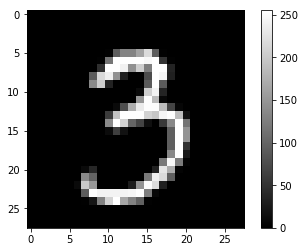

In [100]:
Data=mnist.data
Label=mnist.target
Imagen=Data[20000].reshape((28,28))
plt.imshow(Imagen,'gray')
plt.colorbar()

# Normalizacion

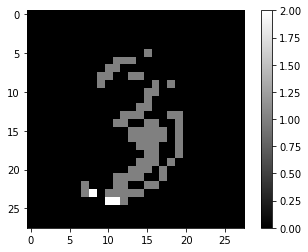

In [102]:
for i in range(Data.shape[1]):
    m=np.mean(Data[:,i])
    s=np.std(Data[:,i])
    if s==0:
        Data[:,i]=Data[:,i]-m
    else:
        Data[:,i]=(Data[:,i]-m)/s
Imagen=Data[20000].reshape((28,28))
plt.imshow(Imagen,'gray')
plt.colorbar()

## Escogencia de datos y division Train/Test

In [118]:
Data3=Data[(np.where(Label==3))[0]]
Label3=Label[(np.where(Label==3))[0]]
cantidadtrain=int(len(Label3)*0.8)
Data3train , Data3test = Data3[:cantidadtrain] , Data3[cantidadtrain:]
Label3train, Label3test = Label3[:cantidadtrain] , Label3[cantidadtrain:]

Data5=Data[(np.where(Label==5))[0]]
Label5=Label[(np.where(Label==5))[0]]
cantidadtrain=int(len(Label5)*0.8)
Data5train , Data5test = Data5[:cantidadtrain] , Data5[cantidadtrain:]
Label5train, Label5test = Label5[:cantidadtrain] , Label5[cantidadtrain:]

DataTrain=np.concatenate((Data3train,Data5train),axis=0)
DataTest=np.concatenate((Data3test,Data5test),axis=0)

LabelTrain=np.concatenate((Label3train,Label5train),axis=0)
LabelTest=np.concatenate((Label3test,Label5test),axis=0)

## Entrenamiento de SVM lineal

[Text(0,0,u'2e-15'),
 Text(0,0,u'2e-10'),
 Text(0,0,u'2e-05'),
 Text(0,0,u'1'),
 Text(0,0,u'200000.0'),
 Text(0,0,u'20000000000.0')]

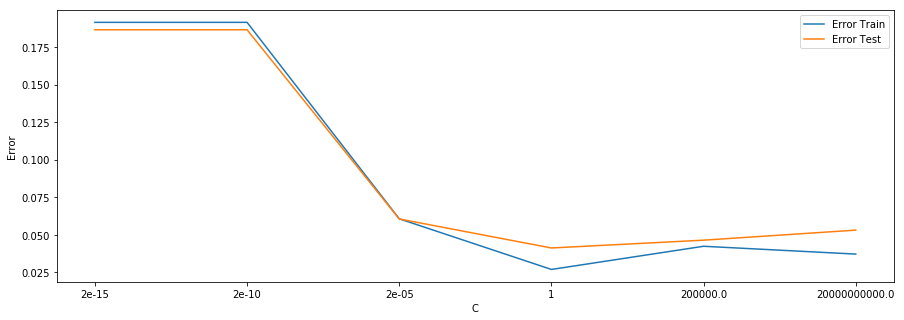

In [162]:
from sklearn.svm import LinearSVC
C=[2e-15,2e-10,2e-5,1,2e5,2e10]
errortrain=np.zeros(len(C))
errortest=np.zeros(len(C))
for i in range(len(C)):
    clf=LinearSVC(C=C[i])
    clf.fit(DataTrain,LabelTrain)
    errortest[i]=np.mean((clf.predict(DataTrain)!=LabelTrain)*1)
    errortrain[i]=np.mean((clf.predict(DataTest)!=LabelTest)*1)
plt.figure(figsize=(15,5))
plt.plot(errortest)
plt.plot(errortrain)
plt.xlabel("C")
plt.ylabel("Error")
plt.legend(["Error Train","Error Test"])
ax = plt.axes()
ax.xaxis.set_ticks([0, 1, 2, 3, 4,5])
ax.xaxis.set_ticklabels(C)

## Para C=1 tanto el error cometido en el grupo de entrenamiento y el de prueba son los mas bajos

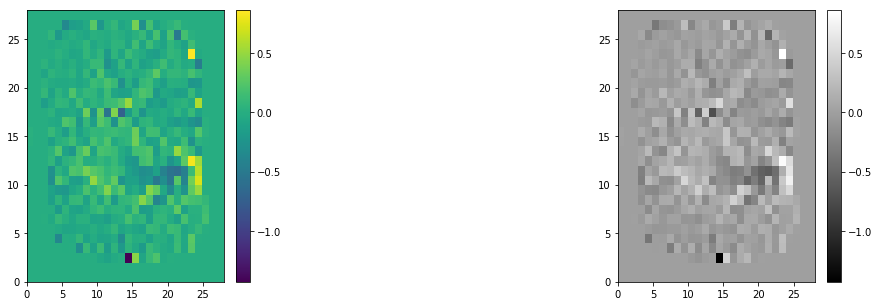

In [171]:
clf=LinearSVC(C=1)
clf.fit(DataTrain,LabelTrain)
# Pesos del modelo de clasificacion para C=1
W=clf.coef_
W=W.reshape((28,28))
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.pcolor(W)
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolor(W,cmap='gray')
plt.colorbar()

En la grafica de los pesos podemos decir que primero los valores que son cero que son los vectores que no pertenecen al soporte estan en el borde de la imagen por lo que es poco probable que la figura del numero pase por esos puntos.
Ademas los valores extremos nos dicen la preferencia hacia una clase en especifico, se puede decir que si el trazo del numero pasa por un pixel de color evidente es mas probable que este numero pertenezca a la clase que determina el color.

In [163]:
def punto2(a,b):
    Data3=Data[(np.where(Label==a))[0]]
    Label3=Label[(np.where(Label==a))[0]]
    cantidadtrain=int(len(Label3)*0.8)
    Data3train , Data3test = Data3[:cantidadtrain] , Data3[cantidadtrain:]
    Label3train, Label3test = Label3[:cantidadtrain] , Label3[cantidadtrain:]

    Data5=Data[(np.where(Label==b))[0]]
    Label5=Label[(np.where(Label==b))[0]]
    cantidadtrain=int(len(Label5)*0.8)
    Data5train , Data5test = Data5[:cantidadtrain] , Data5[cantidadtrain:]
    Label5train, Label5test = Label5[:cantidadtrain] , Label5[cantidadtrain:]

    DataTrain=np.concatenate((Data3train,Data5train),axis=0)
    DataTest=np.concatenate((Data3test,Data5test),axis=0)

    LabelTrain=np.concatenate((Label3train,Label5train),axis=0)
    LabelTest=np.concatenate((Label3test,Label5test),axis=0)
    plt.figure(figsize=(15,5))
    for i in range(len(C)):
        clf=LinearSVC(C=C[i])
        clf.fit(DataTrain,LabelTrain)
        W=clf.coef_
        W=W.reshape((28,28))
        plt.subplot(2,3,i+1)
        plt.pcolor(W)
        plt.colorbar()

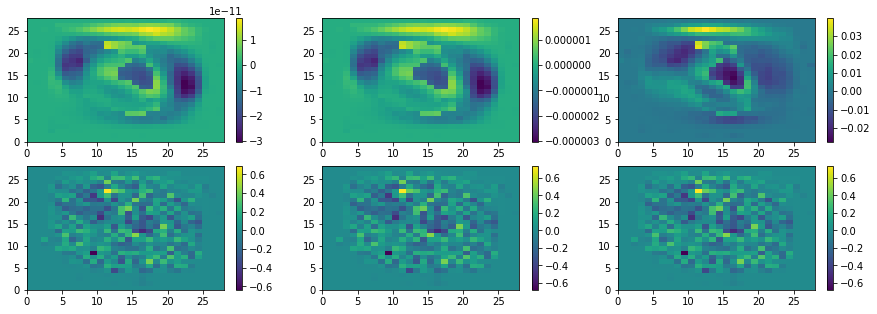

In [164]:
#Clasificar 0 y 9
punto2(0,9)

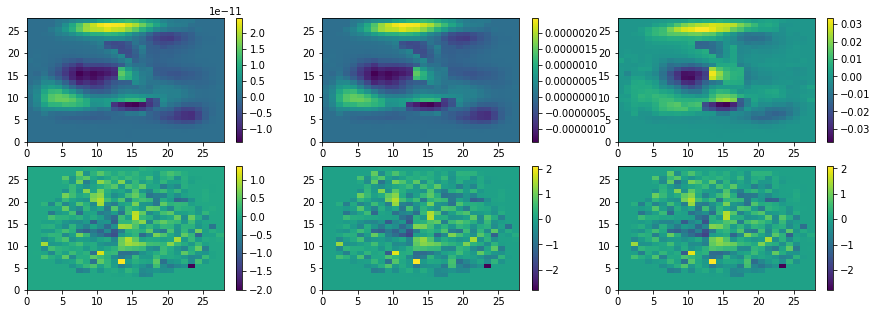

In [165]:
#Clasificar 4 y 7 
punto2(4,7)

Se puede Observar que para cada par de numeros a clasificar se genera un distinto vector de Pesos, y que para valores pequeños de C la escala tambien es muy pequeña del orden de 1e-11 y genera regiones significantes con preferencia a una clase, lo que conlleva a un error de clasificacion mayor que se puede ver en la grafica de errores.
Por ultimo aumentar el valor de C despues de C=1 no hace gran diferencia, por lo que se puede decir que C=1 es un valor optimo.

## Punto 3

## Definicion de los datos de entrenamiento y prueba 

In [378]:
A=['about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'among', 'amongst', 'amoungst', 'amount', 'another', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'around', 'back', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'call', 'cannot', 'cant', 'computer', 'could', 'couldnt', 'describe', 'detail', 'done', 'down', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first', 'five', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'give', 'hasnt', 'have', 'hence', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'himself', 'however', 'hundred', 'indeed', 'interest', 'into', 'itself', 'keep', 'last', 'latter', 'latterly', 'least', 'less', 'made', 'many', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine', 'nobody', 'none', 'noone', 'nothing', 'nowhere', 'often', 'once', 'only', 'onto', 'other', 'others', 'otherwise', 'ours', 'ourselves', 'over', 'part', 'perhaps', 'please', 'rather', 'same', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'should', 'show', 'side', 'since', 'sincere', 'sixty', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 'take', 'than', 'that', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thick', 'thin', 'third', 'this', 'those', 'though', 'three', 'three', 'through', 'throughout', 'thru', 'thus', 'together', 'toward', 'towards', 'twelve', 'twenty', 'under', 'until', 'upon', 'very', 'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'whoever', 'whole', 'whom', 'whose', 'will', 'with', 'within', 'without', 'would', 'your', 'yours', 'yourself', 'yourselves']
B=['esta', 'estas', 'este', 'estos', 'ultima', 'ultimas', 'ultimo', 'ultimos', 'actualmente', 'adelante', 'ademas', 'afirmo', 'agrego', 'ahora', 'algun', 'algo', 'alguna', 'algunas', 'alguno', 'algunos', 'alrededor', 'ambos', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente', 'aqui', 'aseguro', 'aunque', 'ayer', 'bajo', 'bien', 'buen', 'buena', 'buenas', 'bueno', 'buenos', 'como', 'cada', 'casi', 'cerca', 'cierto', 'cinco', 'comento', 'como', 'conocer', 'considero', 'considera', 'contra', 'cosas', 'creo', 'cual', 'cuales', 'cualquier', 'cuando', 'cuanto', 'cuatro', 'cuenta', 'dado', 'debe', 'deben', 'debido', 'decir', 'dejar', 'demas', 'dentro', 'desde', 'despues', 'dice', 'dicen', 'dicho', 'dieron', 'diferente', 'diferentes', 'dijeron', 'dijo', 'donde', 'durante', 'ejemplo', 'ella', 'ellas', 'ello', 'ellos', 'embargo', 'encuentra', 'entonces', 'entre', 'eran', 'esas', 'esos', 'esta', 'estan', 'estaba', 'estaban', 'estamos', 'estar', 'estara', 'estas', 'este', 'esto', 'estos', 'estoy', 'estuvo', 'existe', 'existen', 'explico', 'expreso', 'fuera', 'fueron', 'gran', 'grandes', 'habia', 'habian', 'haber', 'habra', 'hace', 'hacen', 'hacer', 'hacerlo', 'hacia', 'haciendo', 'hasta', 'haya', 'hecho', 'hemos', 'hicieron', 'hizo', 'hubo', 'igual', 'incluso', 'indico', 'informo', 'junto', 'lado', 'llego', 'lleva', 'llevar', 'luego', 'lugar', 'manera', 'manifesto', 'mayor', 'mediante', 'mejor', 'menciono', 'menos', 'mientras', 'misma', 'mismas', 'mismo', 'mismos', 'momento', 'mucha', 'muchas', 'mucho', 'muchos', 'nada', 'nadie', 'ningun', 'ninguna', 'ningunas', 'ninguno', 'ningunos', 'nosotras', 'nosotros', 'nuestra', 'nuestras', 'nuestro', 'nuestros', 'nueva', 'nuevas', 'nuevo', 'nuevos', 'nunca', 'ocho', 'otra', 'otras', 'otro', 'otros', 'para', 'parece', 'parte', 'partir', 'pasada', 'pasado', 'pero', 'pesar', 'poca', 'pocas', 'poco', 'pocos', 'podemos', 'podra', 'podran', 'podria', 'podrian', 'poner', 'porque', 'posible', 'proximo', 'proximos', 'primer', 'primera', 'primero', 'primeros', 'principalmente', 'propia', 'propias', 'propio', 'propios', 'pudo', 'pueda', 'puede', 'pueden', 'pues', 'quedo', 'queremos', 'quien', 'quien', 'quienes', 'quiere', 'realizo', 'realizado', 'realizar', 'respecto', 'sean', 'segun', 'segunda', 'segundo', 'seis', 'sera', 'seran', 'seria', 'sido', 'siempre', 'siendo', 'siete', 'sigue', 'siguiente', 'sino', 'sobre', 'sola', 'solamente', 'solas', 'solo', 'solos', 'tambien', 'tampoco', 'tanto', 'tenia', 'tendra', 'tendran', 'tenemos', 'tener', 'tenga', 'tengo', 'tenido', 'tercera', 'tiene', 'tienen', 'toda', 'todas', 'todavia', 'todo', 'todos', 'total', 'tras', 'trata', 'traves', 'tres', 'tuvo', 'unas', 'unos', 'usted', 'vamos', 'varias', 'varios', 'veces']
#Alfabeto
Alf=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

a=len(A)
b=len(B)
labelA=np.ones(a)
labelB=-1*np.ones(b)
M=[None]*a
for i in range(a):
    M[i]=[A[i],labelA[i]]
N=[None]*b
for i in range(b):
    N[i]=[B[i],labelB[i]]
datos=M+N
datos=np.array(datos)
datos=np.random.permutation(datos)
Data=list(datos[:,0])
Label=map(float,datos[:,1])
n=int((a+b)*0.8)
Datatrain=Data[:n]
Datatest=Data[n:]
Labeltrain=Label[:n]
Labeltest=Label[n:]

import itertools
def combinaciones(n,m):
    A = np.arange(n)
    lista = []
    for r in [m]:
        res = itertools.combinations(A, r)
        for e in res:
            lista.append(e)
    return lista

## funcion phi
def phi(s,k,lamda,comb):
    numero=len(comb)
    z=np.zeros(numero)  
    t1=len(s)
    lista=combinaciones(t1,k) 
    for i in range(numero):    
        phi=0
        if k==2 and comb[i][0] in s and comb[i][1] in s:
            for j in lista:
                if s[j[0]]+s[j[1]]==comb[i]:
                        l=j[-1]-j[0]+1
                        phi=phi+lamda**l
                        
        if k==3 and comb[i][0] in s and comb[i][1] in s and comb[i][2] in s:
            for j in lista:
                if s[j[0]]+s[j[1]]+s[j[2]]==comb[i]:
                        l=j[-1]-j[0]+1
                        phi=phi+lamda**l
                        
        if k==4 and comb[i][0] in s and comb[i][1] in s and comb[i][2] in s and comb[i][3] in s:
            for j in lista:
                if s[j[0]]+s[j[1]]+s[j[2]]+s[j[3]]==comb[i]:
                        l=j[-1]-j[0]+1
                        phi=phi+lamda**l
        z[i]=phi
    return z

## definicion del kernel y normalizacion
def kernel(s,t,k,lamda,comb):
    return np.dot(phi(s,k,lamda,comb),phi(t,k,lamda,comb))

def kernelnormal(s,t,k,lamda,comb):
    return kernel(s,t,k,lamda,comb)/np.sqrt(kernel(s,s,k,lamda,comb)*kernel(t,t,k,lamda,comb))
    

In [403]:
from sklearn.svm import SVC
def punto3(k,lamda):
    combinacion=[]
    if k==2:
        for i in Alf:
            for j in Alf:
                    combinacion.append(i+j)
    if k==3:
        for i in Alf:
            for j in Alf:
                for l in Alf:
                    combinacion.append(i+j+l)
    if k==4:
        for i in Alf:
            for j in Alf:
                for l in Alf:
                    for m in Alf:
                        combinacion.append(i+j+l+m)       
                        
    # Matriz de kernel datos de entrenamiento
    m=len(Datatrain)
    M=np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            M[i][j]=kernelnormal(Datatrain[i],Datatrain[j],k,lamda,combinacion)
    #entrenamiento de la SVM
    clf=SVC(kernel='precomputed')
    clf.fit(M,np.array(Labeltrain))
    n=len(Datatest)
    # Matriz de kernel datos de prueba
    N=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            N[i][j]=kernelnormal(Datatest[i],Datatrain[j],k,lamda,combinacion)
    #print(clf.predict(N))
    
     
    #return clf.score(N,Labeltest)# porcentaje de datos que clasifico bien
    return clf.predict(N) #predicciones del conjunto de prueba 

In [380]:
k=[2,3,4]
lamda=[0.1,0.3,0.5,0.7,0.9]
Resultados=np.zeros((3,5))
for i in range(5):
    Resultados[0][i]=punto3(k[0],lamda[i])    


In [381]:
Resultados[0]

array([0.86538462, 0.875     , 0.88461538, 0.89423077, 0.92307692])

Para los strings formados con dos caracteres el valor de lamba que hace que la SVM clasifique mejor los datos de prueba es lamda=0.9

In [389]:
predicciones=punto3(2,0.9)

Ejemplos mal clasificados

In [393]:
np.where(predicciones!=Labeltest)

(array([ 22,  26,  31,  56,  64,  76,  91, 102]),)

In [400]:
Datatest[22], Datatest[26], Datatest[31], Datatest[56], Datatest[64], Datatest[91], Datatest[102]

('describe', 'posible', 'under', 'during', 'take', 'seis', 'llevar')

En los casos de 'describe' y 'posible' el error se pudo haber dado  ya que estas palabras pertenecen a los dos idiomas.

El caso de 'during' es un error que en teoria no deberia pasar, ya que el sufijo 'ing' es exclusivamente del idioma ingles, tal vez solucionable al añadir mas ejemplos de palabras con este sufijo en los datos de entrenamiento.

Las palabras 'under' y 'llevar' pueden tener un tipo de error comun, en español la mayoria de los verbos teminan en 'vocal+r' lo que explicaria por que 'under' esta mal clasificado, lo que hace extraño que 'llevar' tambien lo halla clasificado mal.

Resultados para strings de tamaño 3

In [402]:
for i in range(5):
    Resultados[1][i]=punto3(k[1],lamda[i])    
    print(Resultados)
    print("---------------------------")

[[0.86538462 0.875      0.88461538 0.89423077 0.92307692]
 [0.89423077 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
---------------------------
[[0.86538462 0.875      0.88461538 0.89423077 0.92307692]
 [0.89423077 0.88461538 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
---------------------------
[[0.86538462 0.875      0.88461538 0.89423077 0.92307692]
 [0.89423077 0.88461538 0.90384615 0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
---------------------------
[[0.86538462 0.875      0.88461538 0.89423077 0.92307692]
 [0.89423077 0.88461538 0.90384615 0.89423077 0.        ]
 [0.         0.         0.         0.         0.        ]]
---------------------------
[[0.86538462 0.875      0.88461538 0.89423077 0.92307692]
 [0.89423077 0.88461538 0.90384615 0.89423077 0.88461538]
 [0.         0.         0.         0.         0.        ]]
-------------

Como podemos ver para ningun valor de lambda se mejoro la puntuacion obtenida para los strings de tamaño 2 y lamba=0.9, ademas el algoritmo es computacionalmente mas costoso cuando el tamaño de los strings aumenta.

In [ ]:
predicciones=punto3(3,0.5)